# Prepare the Notebook

In [59]:
!pip install control
!git clone https://magiccvs.byu.edu/gitlab/whirlybird/control_book_public_solutions.git
!cd control_book_public_solutions/;  git checkout Fall19_edits; 

fatal: destination path 'control_book_public_solutions' already exists and is not an empty directory.
Already on 'Fall19_edits'
Your branch is up to date with 'origin/Fall19_edits'.


In [0]:
import sys
import numpy as np
import control as c
from control.matlab import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12) #set the figure size
from IPython.display import Latex
from IPython.display import Image

In [0]:
# How to bring in figures from the git repository
basename = 'control_book_public_solutions/_images/'
Img1 = Image(filename=basename+'figures_5/ls_constraint_gamma_r.png',width=1000)
Img2 = Image(filename=basename+'figures_5/ls_constraint_gamma_n.png',width=1000)
Img3 = Image(filename=basename+'figures_5/ls_constraint_gamma_do.png',width=1000)
Img4 = Image(filename=basename+'figures_5/ls_constraint_gamma_di.png',width=1000)
Img5 = Image(filename=basename+'figures_5/ls_constraint_type0.png',width=1000)
Img6 = Image(filename=basename+'figures_5/ls_constraint_type1.png',width=1000)
Img7 = Image(filename=basename+'figures_5/ls_constraint_type2.png',width=1000)

# Part 5: Loopshaping Control Design
## Chapter 16: Frequency Domain Specifications

### Lecture Notes

This notebook covers the material in Chapter 16 of the [text](http://controlbook.byu.edu/doku.php) in brief form, allowing you to make changes and manipulate the examples.  The goal is for this resource to help you bridge the gap between theory and the practical.

## 16.1.1 Tracking 
Our goal in Tracking is to keep our error below some value for some amount of frequency content $\omega \leq \omega_r$: 

$|e(t)| \leq \gamma_r |r(t)|$,  where $\gamma_r$ is the error percentage. 

The chapter derives an expression for the open loop control and plant combination (called the Loop Gain) $P(j \omega) C(j \omega)$ and $\gamma_r$ to maintain tracking to a value of less than $\gamma_r$:

$20 \text{ log}_{10} |P(j \omega) C(j \omega)| \geq 20 \text{ log}_{10} \frac{1}{\gamma_r}$


One way to use this expression is to first is to select a point on the magnitude Bode plot for some desired $\omega$, where 
$20 \text{log}_{10} |P(j \omega) C(j \omega)| > B_r$

and then solve for $\gamma_r$ like so: 

$\gamma_r = 10^{-B_r/20}$

The point $B_r$ is the point on the Loop Gain curve at $\omega_r$ in the figure below.  The shaded region shows the magnitude required to track the signal with only $\gamma_r$ in error. 

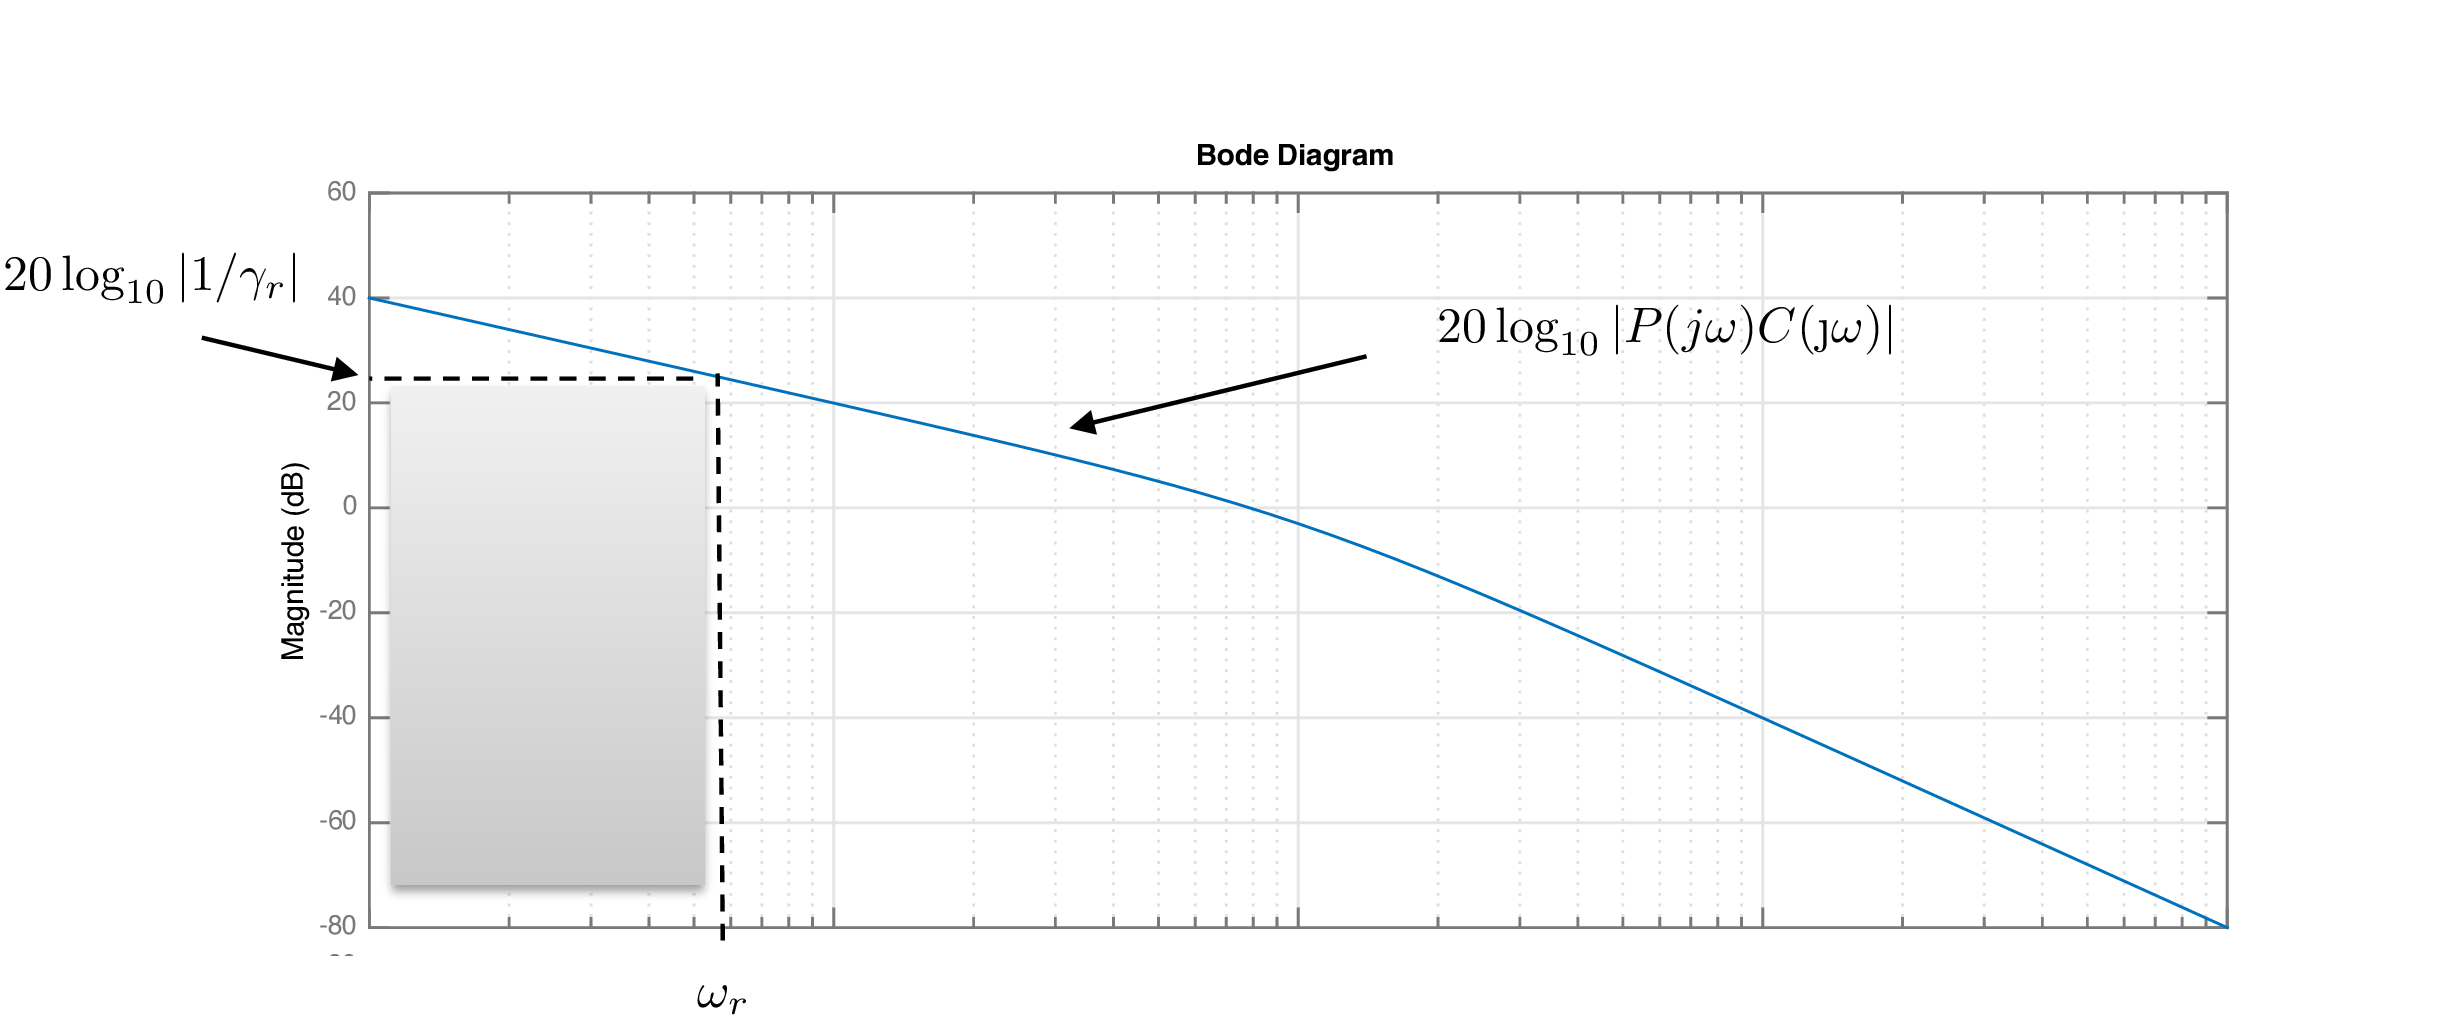

In [0]:
Img1

So if $\gamma_r = 0.05$, (5% error), and the Loop Gain curve is above that corner point, the error, for input frequencies less than $\omega_r$, will be less than 5% error. 

##16.1.2 Noise Attentuation
Goal in Noise Attenuation is to reduce the amount of noise coming through the controlled system, for some frequency content $\omega > \omega_{no}$, so that the error due to the noise signal satisfies

$|e(t)|\leq \gamma_n |n(t)|$.

So the book leads us to this situation:

$20 \text{ log}_{10} |P(j \omega) C(j \omega)| \geq 20 \text{ log}_{10} \frac{1}{\gamma_n}$

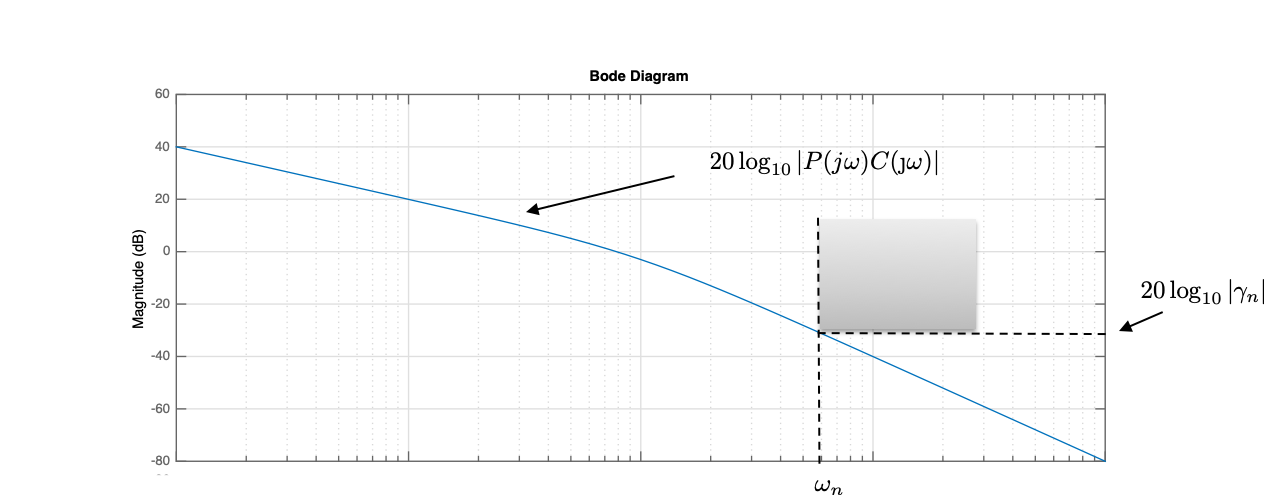

In [0]:
Img2

Similarly to the Tracking Section above, we first select a point $B_n$ on the magnitude Bode plot of $P(j \omega) C(j\omega)$ for some desired $\omega_{no}$, where 
$20 \text{ log}_{10} |P(j \omega) C(j \omega)| > B_{n}$

So what we are looking for is to find a point $B_n$, such that for all $n(t)$ with frequency content above $\omega_{no}$, 

$
\gamma_n = 10^{B_n/20}.
$

## 16.1.3 Reject Output Disturbances
Lower frequencies are the focus for output disturbances. The objective is to attenuate output disturbance signals $d_{out}(t)$ with frequency content below $\omega_{d_{out}}$ so that the error due to the output disturbance signal satisfies

$|e(t)|\leq \gamma_{d_{out}} |d_{out}(t)|$.

Therefore, the controller $C(s)$ needs to be designed so that
$|P(j\omega)C(j\omega)| \geq \frac{1}{\gamma_{d_{out}}}$.

or equivalently

$20\log_{10}|P(j\omega)C(j\omega)| \geq 20\log_{10}1/\gamma_{d_{out}}$,

which needs to be satisfied for all $\omega\leq\omega_{d_{out}}$.  On a Bode plot, the constraint represented is shown graphically below: 

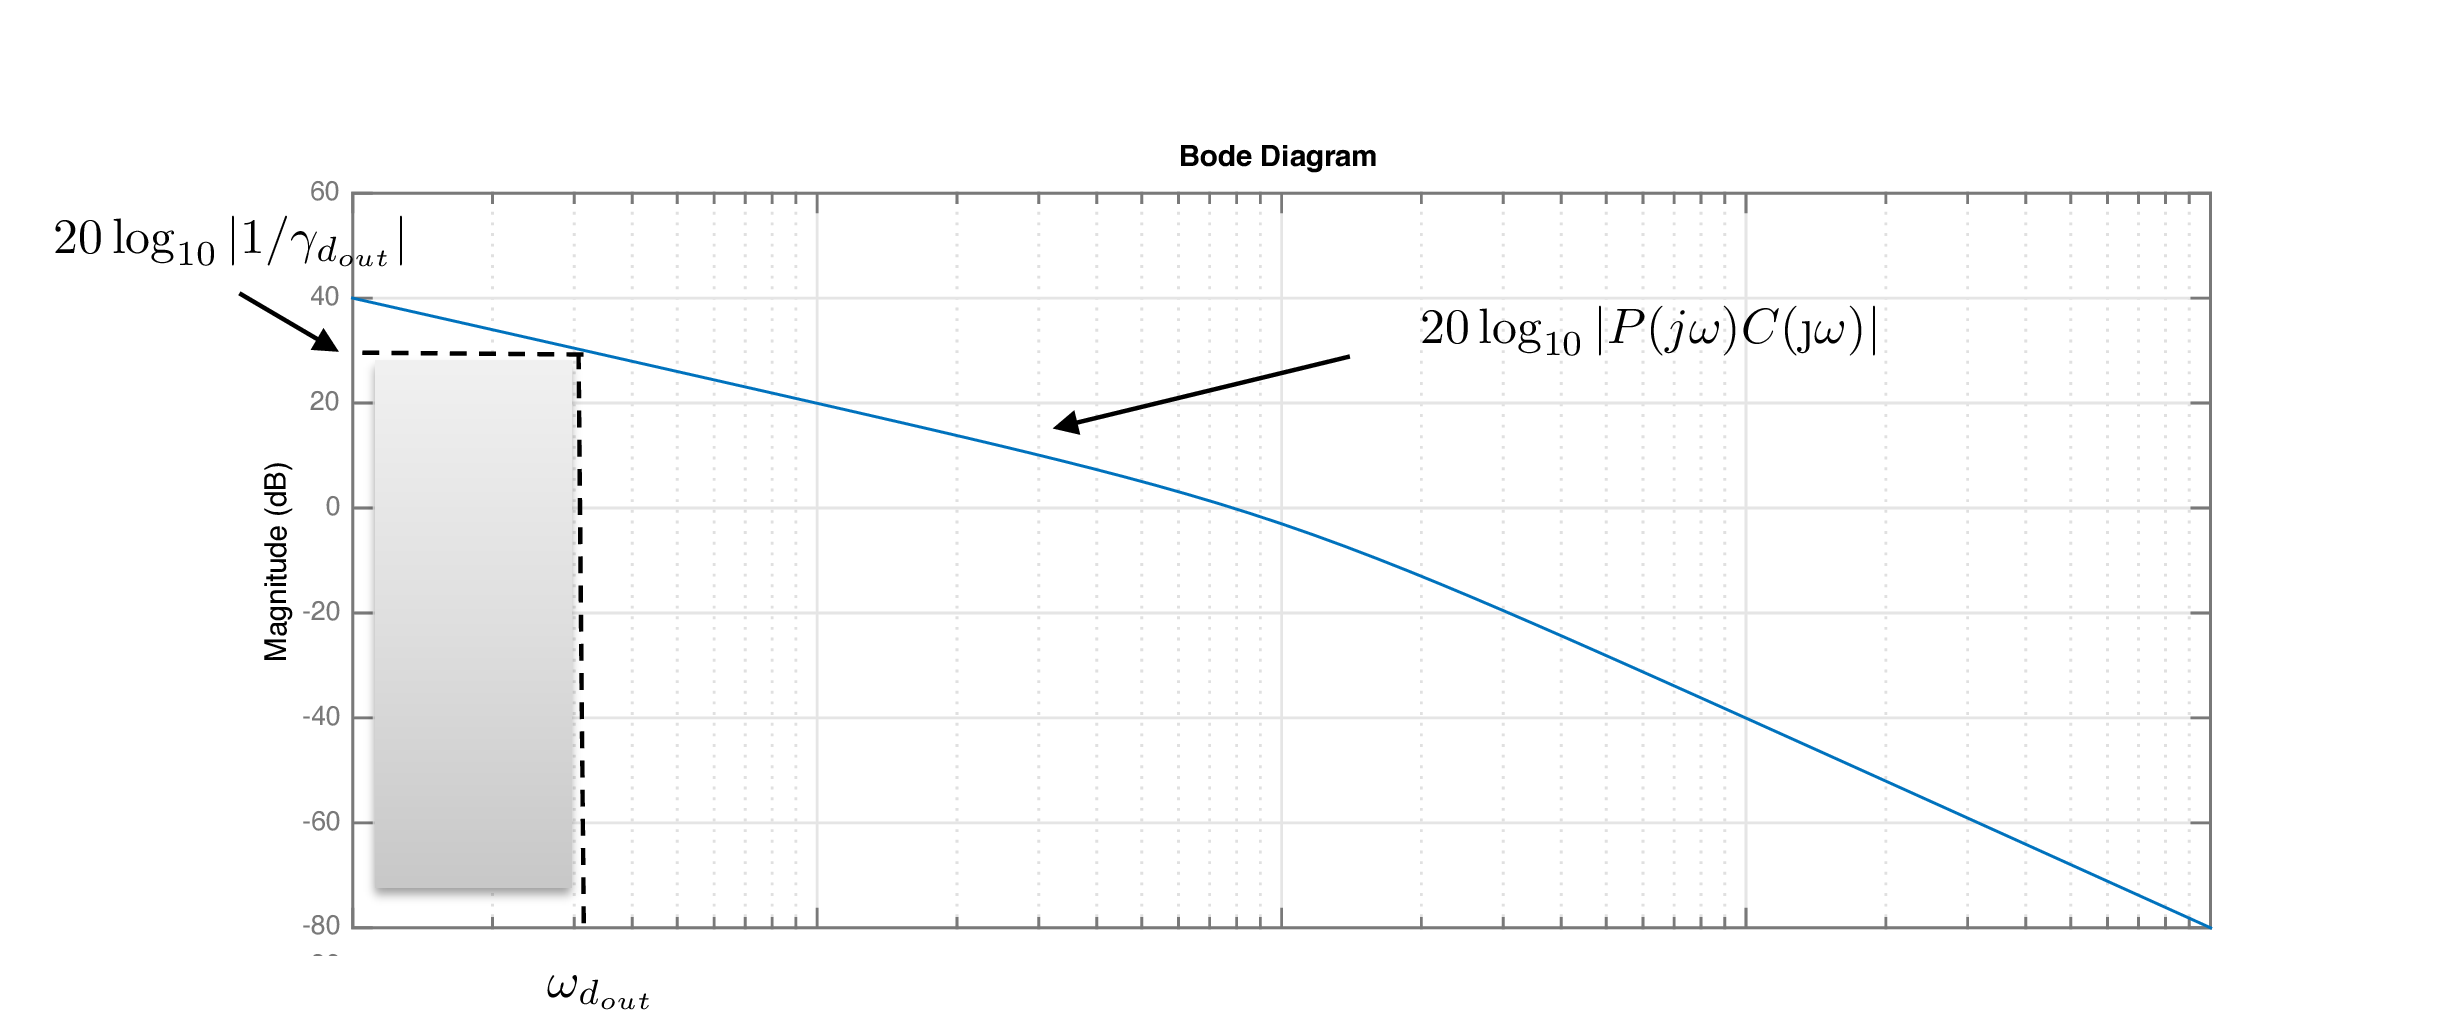

In [0]:
Img3

For example, suppose that on the Bode plot 
$ 20\log_{10}|P(j\omega)C(j\omega)|> B_{d_{out}}\text{~dB}$

for all $\omega<\omega_{d_{out}}$, then 

$|P(j\omega)C(j\omega)| > 10^{B_{d_{out}}/20},$

for all $\omega<\omega_{d_{out}}$. 
Then, it is implied that

$\gamma_{d_{out}} = 10^{-B_{d_{out}}/20}.$


## 16.1.4 Reject Input Disturbances
The objective is to attenuate input disturbance signals $d_{in}(t)$ with frequency content below $\omega_{d_{in}}$ so that the error due to the input disturbance signal satisfies

$|e(t)|\leq \gamma_{d_{in}} |d_{in}(t)|$.

Satisfying this error condition is a bit different, as we now examine the difference in the magnitudes of the plant $|P(j\omega)|$ and the loop gain $|P(j\omega)C(j\omega)|$.  But the text derives a sufficient condition:

$\frac{|P(j\omega)C(j\omega)|}{|P(j\omega)|} \geq \frac{1}{\gamma_{d_{in}}}$,

or equivalently

$20\log_{10}|P(j\omega)C(j\omega)| - 20\log_{10}|P(j\omega)| \geq 20\log_{10}1/\gamma_{d_{in}}$,

which needs to be satisfied for all $\omega\leq\omega_{d_{in}}$.  On a Bode plot, the above constraint is shown graphically in the figure below: 

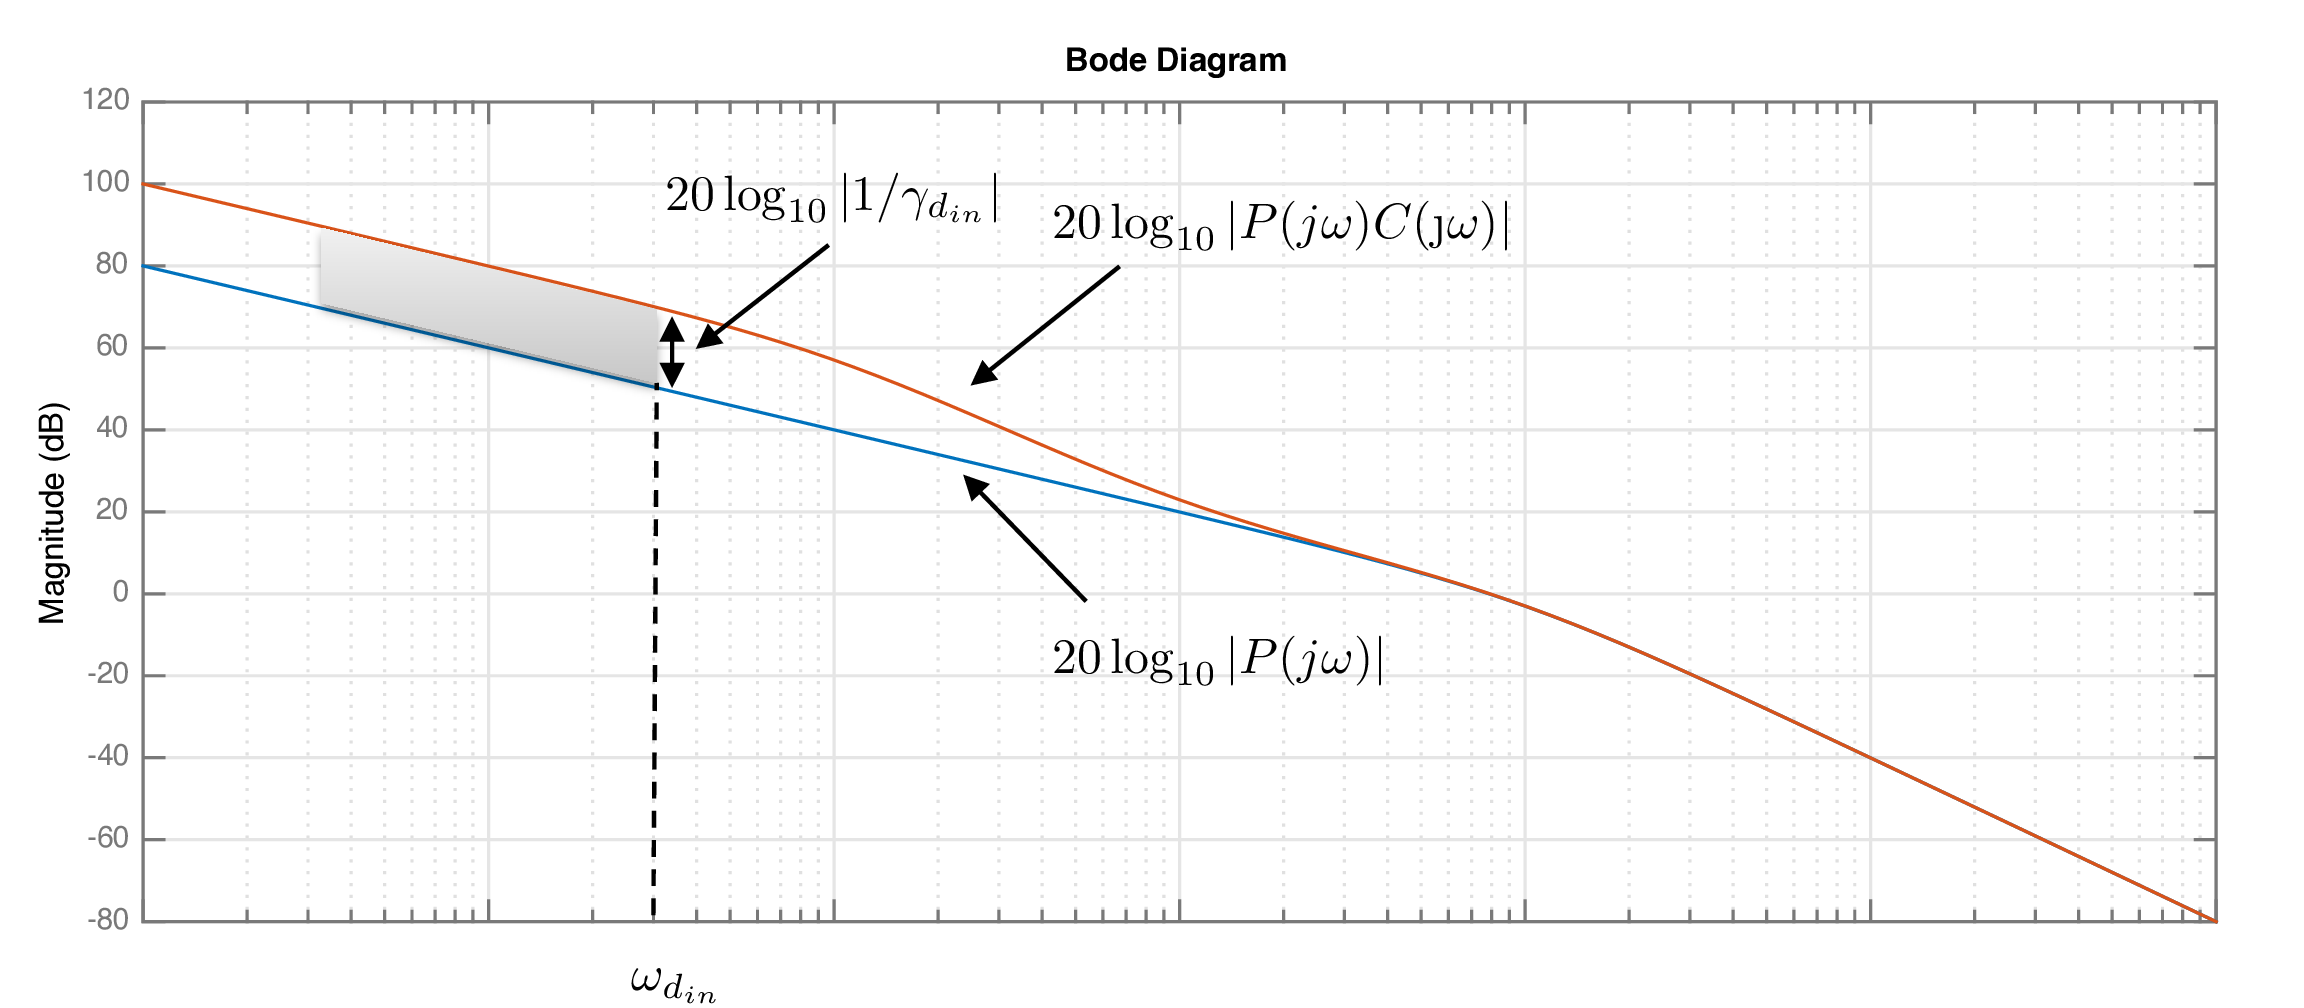

In [0]:
Img4

Alternatively, from the Bode plot of $PC$ and $P$ we can compute the input disturbance rejection characteristics of the closed-loop system.  For example, suppose that on the Bode plot 

$20\log_{10}|P(j\omega)C(j\omega)|-20\log_{10}|P(j\omega)|> B_{d_{in}}\text{~dB}$

for all $\omega<\omega_{d_{in}}$.  Then, through derivation we come up with the relationship 

$|e(t)| \leq 10^{-B_{d_{in}}/20} |d_{in}(t)|$,

for all $d_{in}(t)$ with frequency content below $\omega_{d_{in}}$, 
which implies that

$\gamma_{d_{in}} = 10^{-B_{d_{in}}/20}$.

## 16.1.5 Frequency Response with System Type

Recall that the loop gain $P(s)C(s)$ is said to be 
 - Type 0 if there are no free integrators,
 - Type 1 if there is one free integrator,
 - Type 2 if there are two free integrators, etc..

### Type 0 System
Note that for a type 0 system:

$ \lim_{s\to 0} P(s)C(s) = \text{constant} $

$\implies \lim_{\omega\to 0}|P(j\omega)C(j\omega)| = \text{constant} $

$\implies \lim_{\omega\to 0} 20\log_{10}|P(j\omega)C(j\omega)| = \text{constant}$.

In other words, at low frequency, the Bode magnitude plot (loop gain) is as shown below:

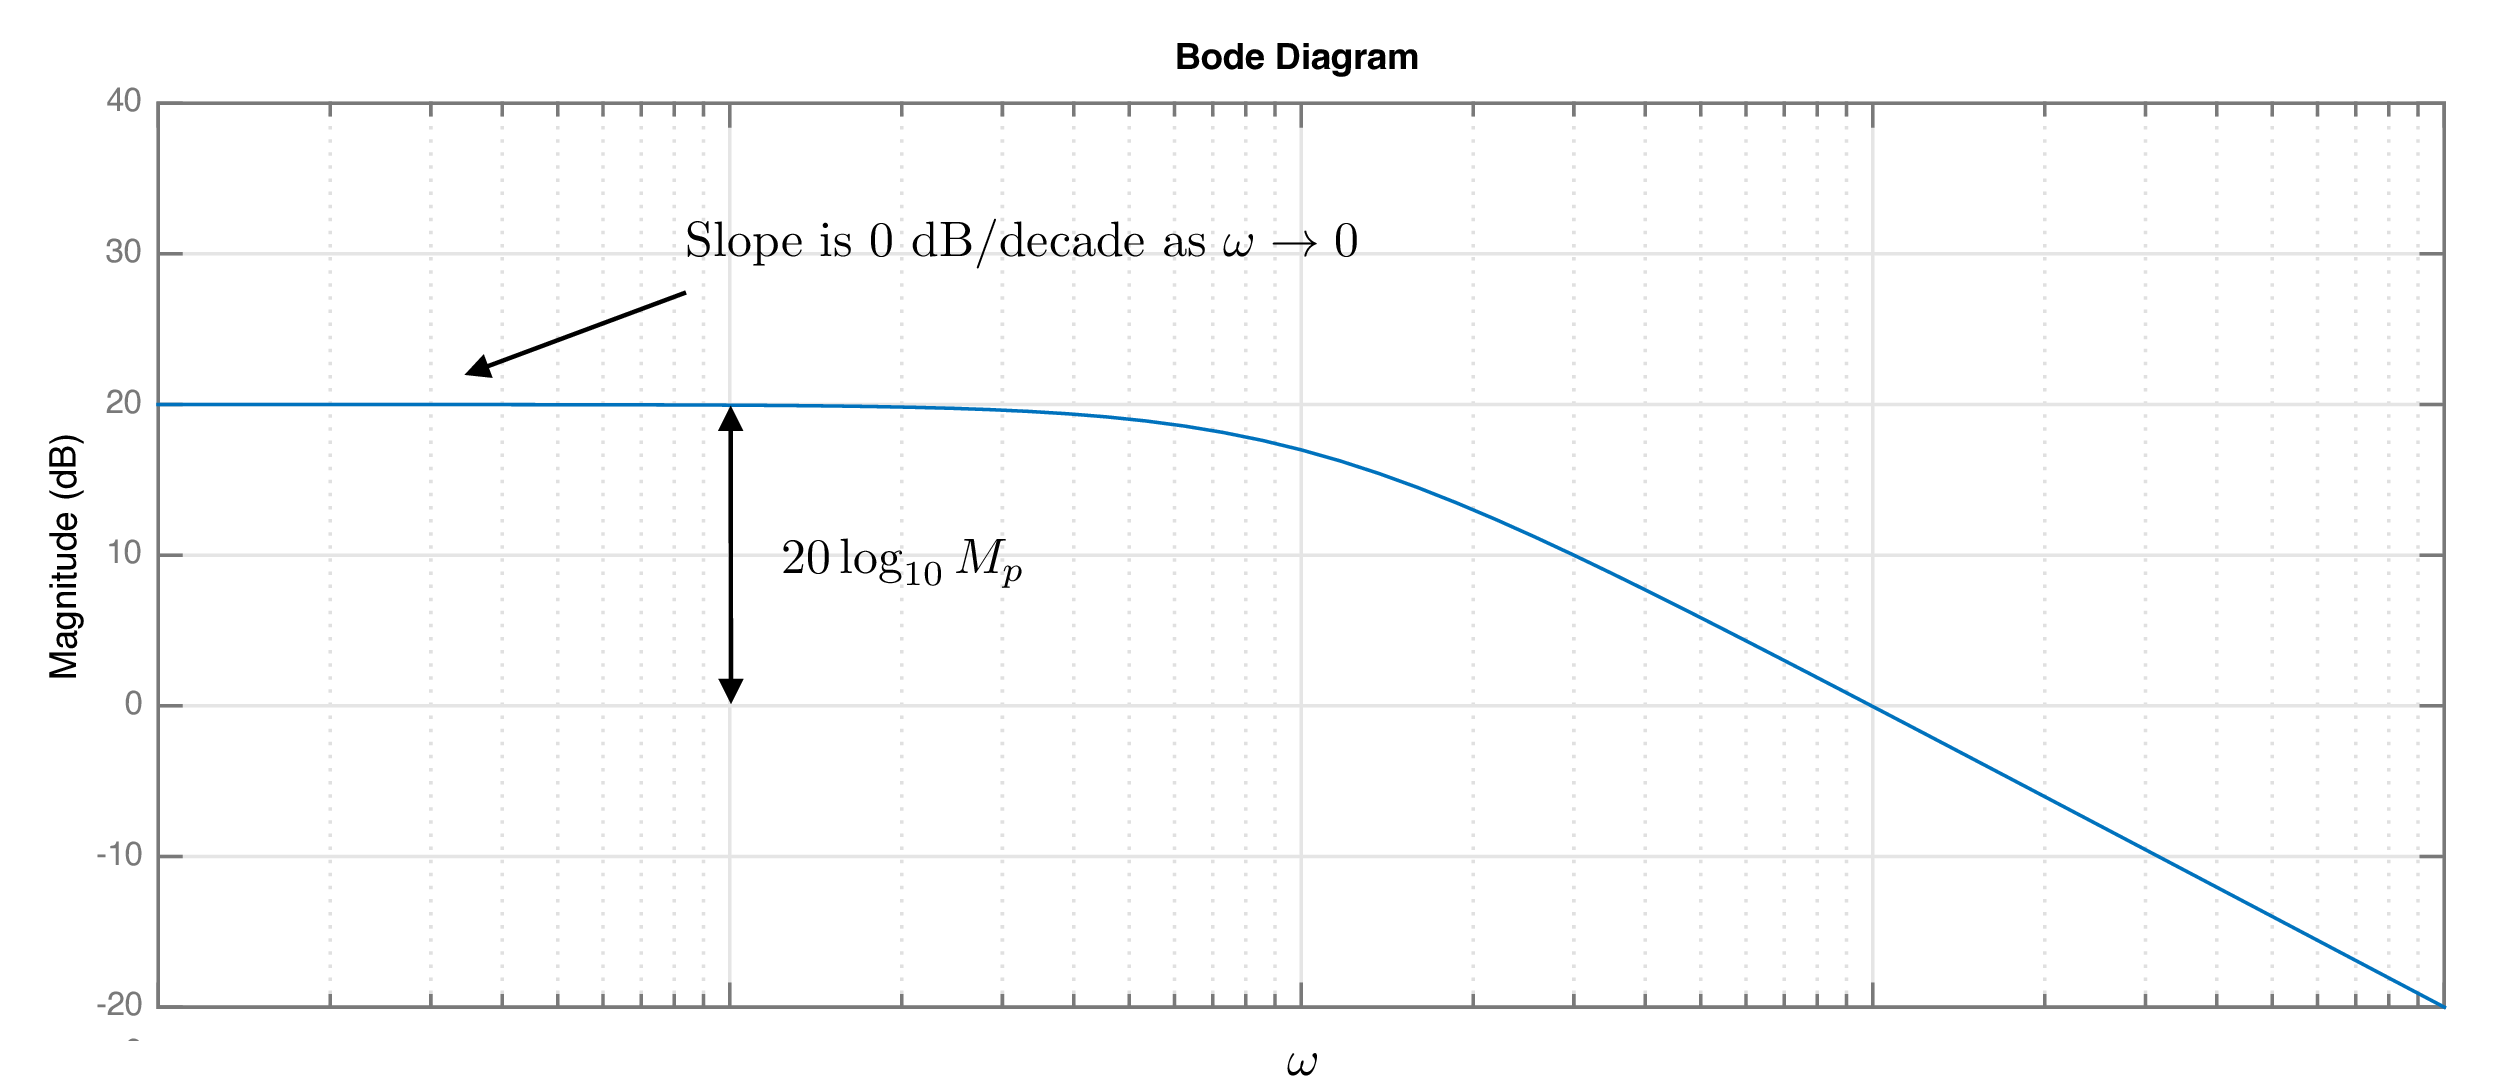

In [0]:
Img5

From the Bode plot of $PC$ for a type 0 system we can compute the tracking error for a step input of size $A$.  Suppose that on the Bode plot 

$\lim_{\omega\to 0} 20\log_{10}|P(j\omega)C(j\omega)| = B_0\text{dB}.$

Then 

$M_p = 10^{B_0/20}$, 

and 

$\lim_{t\to\infty}|e(t)| \leq \frac{1}{1+M_p} A.$


### Type 1 System
For a type~1 system since $P(s)C(s)$ has one free integrator

$\lim_{s\to 0} sP(s)C(s) = \text{constant} $

$\implies  \lim_{\omega\to 0}|(j\omega)P(j\omega)C(j\omega)| = \text{constant} $

$\implies  \lim_{\omega\to 0}\frac{|P(j\omega)C(j\omega)|}{|\frac{1}{j\omega}|} = \text{constant} $

$\implies  \lim_{\omega\to 0} [ 20\log_{10}|P(j\omega)C(j\omega)| - 20\log_{10}|\frac{1}{j\omega}| ]= \text{constant}$

In other words, at low frequency, the Bode magnitude plot of $20\log_{10}|P(j\omega)C(j\omega)|$ has a slope of $-20$dB/decade as $\omega\to 0$, as shown below:


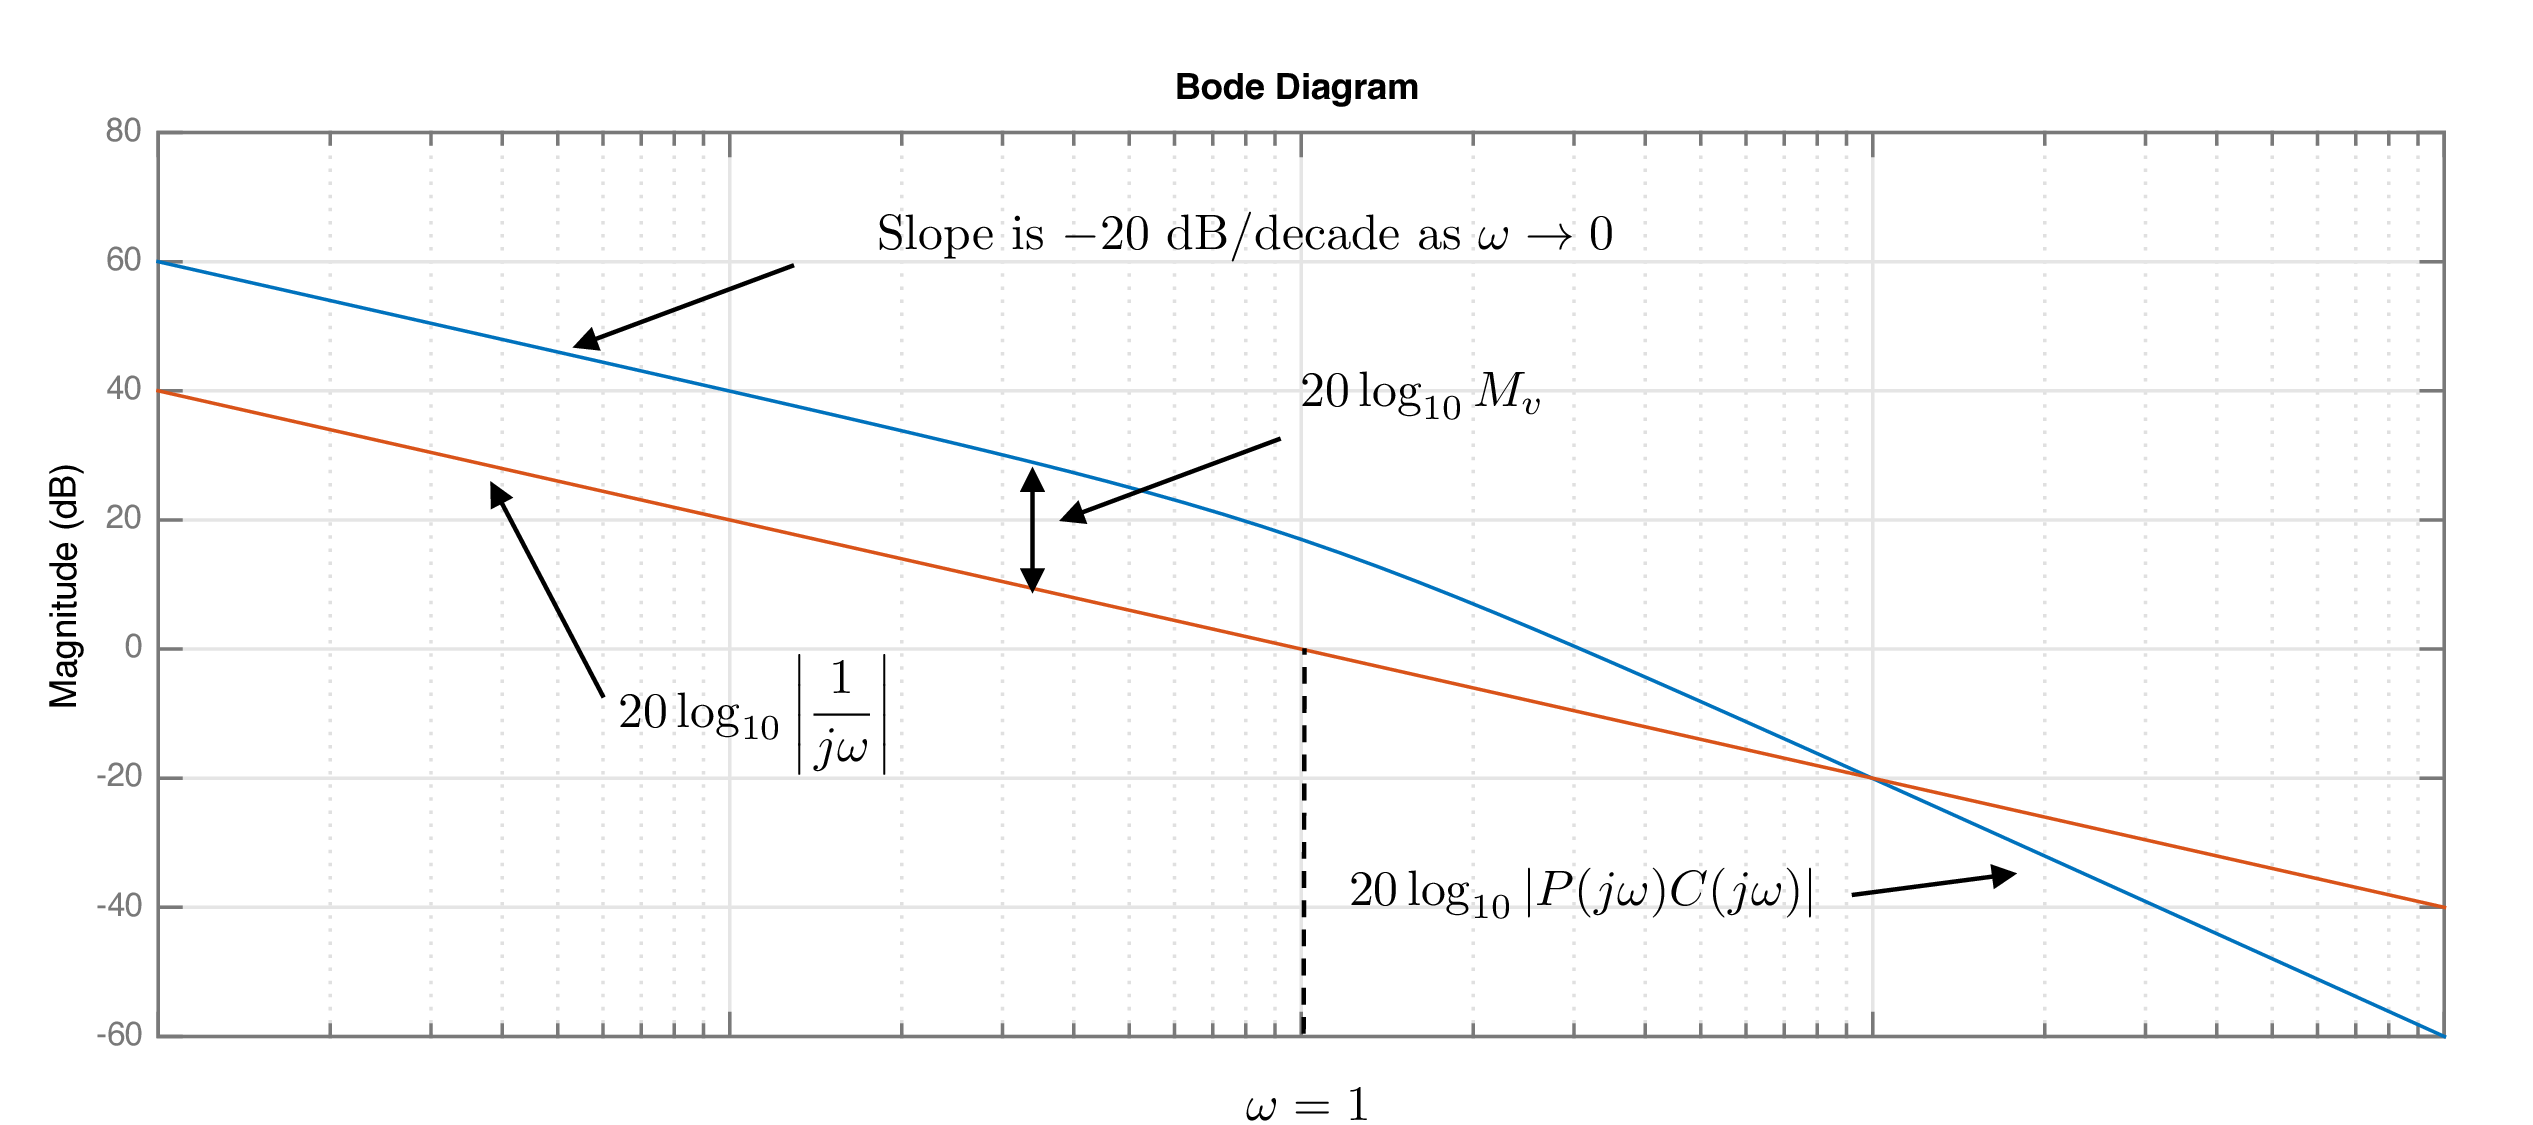

In [0]:
Img6

Recall that for a ramp input  to a type 1 system where $R(s) = A/s^2$, the steady state error is 

$e_{ss} = \lim_{t\to 0} e(t) = \lim_{s\to 0} sE(s) = \lim_{s\to 0} \frac{A}{s+sP(s)C(s)} = \frac{A}{M_v},$  

where 

$M_v = \lim_{s\to 0}sP(s)C(s) = \lim_{\omega\to 0} |(j\omega)P(j\omega)C(j\omega)|$.

As shown in the figure above, $20\log_{10}M_v$ is the amount that the loop gain exceeds the Bode plot of $20\log_{10}|1/j\omega|$ as $\omega\to 0$.

Therefore, from the Bode plot of $PC$ for a type 1 system we can compute the tracking error for a ramp input with slope $A$.  Suppose that on the Bode plot 

$\lim_{\omega\to 0} [ 20\log_{10}|P(j\omega)C(j\omega)| - 20\log_{10}|\frac{1}{j\omega}| ] = B_1\text{dB}$,

then 

$M_v = 10^{B_1/20}$, 

and 

$\lim_{t\to\infty}|e(t)| \leq \frac{1}{M_v} A.$

### Type 2 System
Similarly, for a type 2 system, with 2 free integrators, we have: 

$\lim_{\omega\to 0} [ 20\log_{10}|P(j\omega)C(j\omega)| - 20\log_{10}|\frac{1}{j\omega}|^2 ]= \text{constant}$

Therefore, from the Bode plot of $PC$ for a type 2 system we can compute the tracking error for a parabola input with curvature $A$.  Suppose that on the Bode plot 

$\lim_{\omega\to 0} [ 20\log_{10}|P(j\omega)C(j\omega)| - 20\log_{10}|\frac{1}{j\omega}|^2 ] = B_2\text{dB}$.

Then 

$M_a = 10^{B_2/20}$, 

and 

$\lim_{t\to\infty}|e(t)| \leq \frac{1}{M_a} A.$

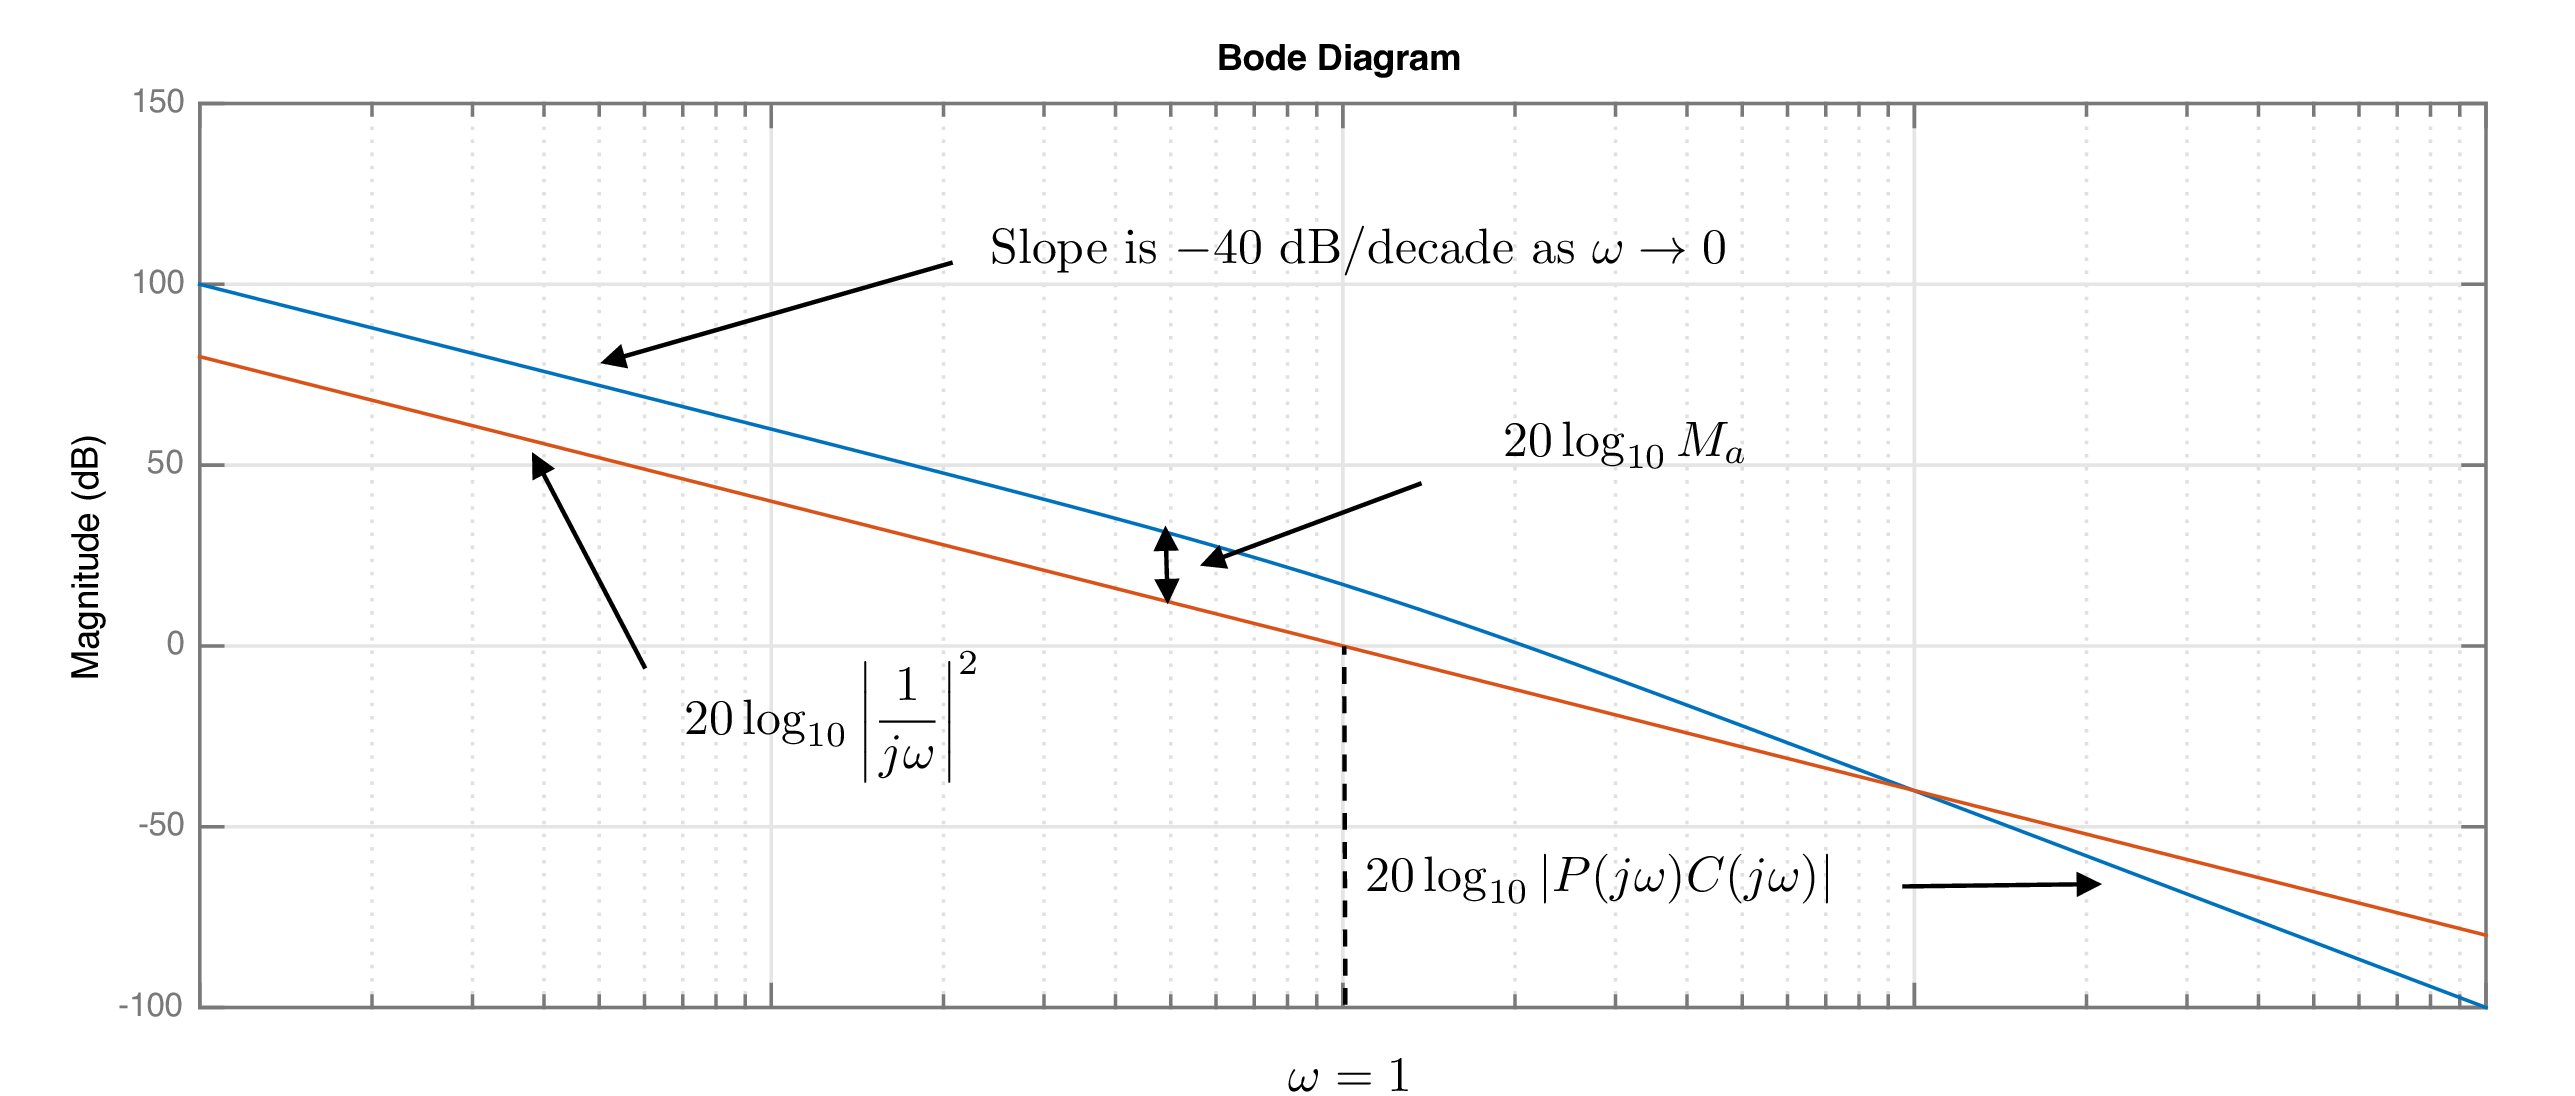

In [0]:
Img7

## Transfer Functions for PID Control 
The transfer function for the PID controller is

$C_{PID}(s) = k_P + \frac{k_I}{s} + \frac{k_D s}{\sigma s + 1} $

which comes to

$C_{PID}(s) = \frac{s(\sigma s+1)k_P + (\sigma s + 1)k_I + k_D s^2}{s(\sigma s + 1)} $,

and finally 

$C_{PID}(s) = \frac{(k_D+\sigma k_P)s^2 + (k_P+\sigma k_I)s + k_I}{s(\sigma s + 1)}$.

This development is tucked away in Ch 17, Design Study A of the textbook. 

In code, this looks like: 

In [0]:
C_pid = tf([(P.kd+P.kp*P.sigma),
            (P.kp+P.ki*P.sigma),P.ki],
           [P.sigma,1.,0.])

# 16.2 Design Study A. Single Link Robot Arm
Plot the Bode for Plant and the Plant under PID control
> (a) What % error can the closed loop system track desired input if $\omega_r = 0.4$ rad/sec?  -> **Tracking Problem**

> (b) If reference Input is $\theta_r(t) = 5 t^2$ for $t \geq 0$  what is the steady state tracking error under PID control?  -> **Type 2 Error Problem**

> (c ) If $d_{in}(t)$ is below $\omega_{d_{in}} = 0.01$ rad/sec, what % of the inpute disturbance shows up in the ouptu  -> **Input Disturbance Problem**

> (d) If the noise freq content is greater than $\omega_{no} = 100$ rad/sec, what % of noise shows up in the output signal? -> **Noise Attenuation Problem**

In [62]:
# Pull in the HW10 parameters 
#%matplotlib tk 
sys.path.append('control_book_public_solutions/_a_arm/python/')
sys.path.append('control_book_public_solutions/_a_arm/python/hw10/')  # add homework directory
import hw10.armParamHW10 as P10
import armParam as P
print("kp: ", P10.kp, "ki: ", P10.ki, "kd: ", P10.kd)

kp:  0.45374999999999993 ki:  0.1 kd:  0.06665499999999998


In [63]:
# Compute the transfer functions: 
#G2 = tf([3/P.m/P.ell**2],[1, 3*P.b/P.m/P.ell**2, -3.*P.g*np.sin(th_e)/2./P.ell]) # Jacobian Linearized
G = tf([2./P.m/P.ell**2.],[1., 2.*P.b/P.m/P.ell**2., 0.]) # feedback linearlized form 
print("Plant: ", G)
C_pid = tf([P10.kd,P10.kp,P10.ki],[P.sigma,1.,0.]) 
print("Control: ", C_pid)
PC = series(G,C_pid)
print("Loopgain: ", PC)

Plant:  
    44.44
-------------
s^2 + 2.222 s

Control:  
0.06665 s^2 + 0.4537 s + 0.1
----------------------------
        0.05 s^2 + s

Loopgain:  
  2.962 s^2 + 20.17 s + 4.444
--------------------------------
0.05 s^4 + 1.111 s^3 + 2.222 s^2



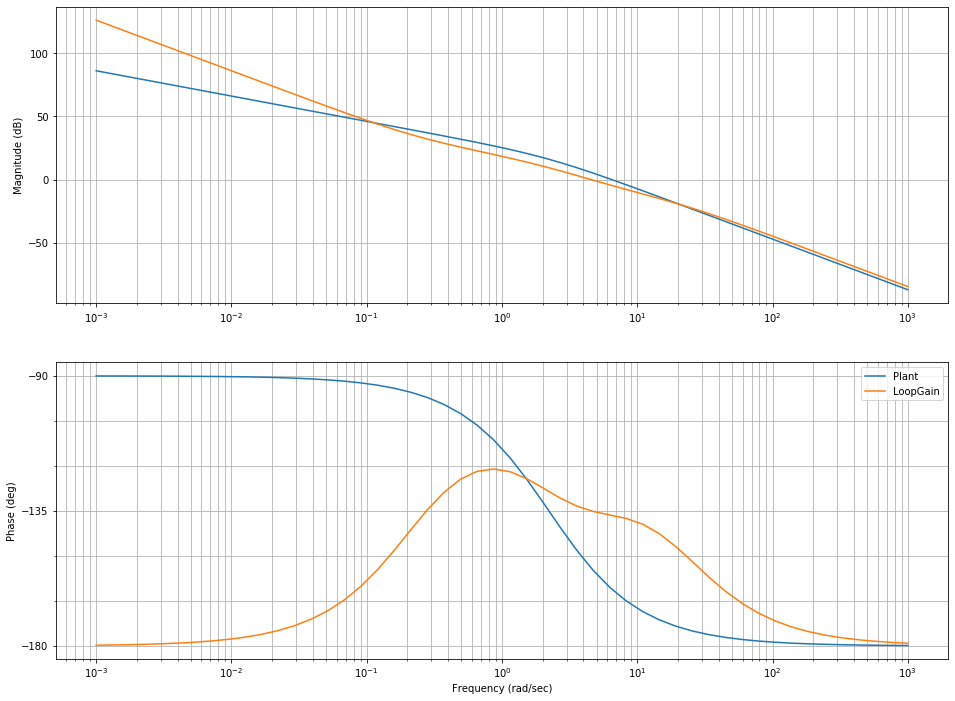

In [64]:
# Create the Bode Plot comparing the Plant (P) and the Loop Gain (PC)
omega = (0.001,1000)
mag, phase, w = bode(G, PC,omega_limits=omega, Hz=False)
plt.legend(['Plant','LoopGain'], loc=0)

## Problem (a) - Design Study A 
We can use the Bode command to retrieve the magnitude at $\omega_r$ = 0.4 rad/sec: 


In [65]:
omega_r = [0.4] 
maga, phasea, wa = bode(PC,omega_r, Plot=False)
print("Linear magnitude: ", maga, " dB Magnitude: ", 20*np.log10(maga))
gamma_r = 1/maga
print("Gamma_r: ", gamma_r)
maga_dB = 20*np.log10(maga)
gamma_r2 = 10.**(-maga_dB/20.)
print("Gamma_r2: ", gamma_r2)

Linear magnitude:  [24.88187212]  dB Magnitude:  [27.91766107]
Gamma_r:  [0.0401899]
Gamma_r2:  [0.0401899]


## Problem (b) - Design Study A
If reference Input is $\theta_r(t) = 5 t^2$ for $t \geq 0$  what is the steady state tracking error under PID control?  -> **Type 2 Error Problem**

The slope of the Loopgain is -40 dB/decade as the frequency is low, meaning that the system is Type 2. 
The system will then have finite error to a parabola input: 
$M_a = 10^{B_2/20}$ and the steady state error is: $e_{ss} = \frac{5}{M_a}$

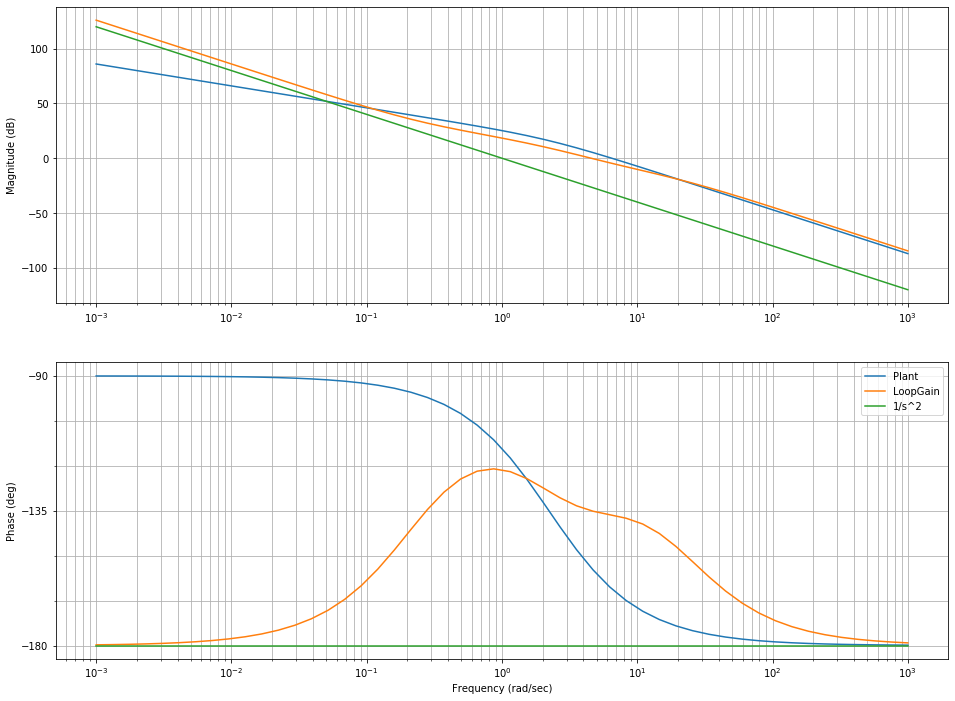

In [0]:
mag, phase, w = bode(G, PC, tf([1.],[1.,0.,0.]), omega_limits=omega, Hz=False)
plt.legend(['Plant','LoopGain','1/s^2'], loc=0)

In [0]:
magb, phaseb, wb = bode(PC,[0.001], Plot=False)
magp, phasep, wp = bode(tf([1.],[1.,0.,0.]),[0.001], Plot=False)

# We can comput the steady state error in 2 ways: Linear and dB.  First Linear: 
print('Linear Mag PC:', magb, ' Linear Mag 1/s^2: ', magp)
diff = magb/magp
Ma_inv = 1./diff # this is 1/M_a

# Second in dB: 
magbdB = 20.*np.log10(magb)
magpdB = 20.*np.log10(magp)
diffdB = magbdB - magpdB
Ma_invdB = 10.**(-diffdB/20.)

# Print comparisons: 
print('Mag PC:', magbdB, ' Mag 1/s^2: ', magpdB)
print('Linear difference: ', diff, 'dB difference: ', diffdB)
print('Ma inverse: ', Ma_inv, 'Ma inverse 2: ', Ma_invdB)

# Compute the Steady State Error: 
ess = 5.*Ma_inv
print('Steady State Error: ', ess)

Mag PC: [2000019.05071206]  Mag 1/s^2:  [1000000.]
Mag PC: [126.02068265]  Mag 1/s^2:  [120.]
Linear difference:  [2.00001905] dB difference:  [6.02068265]
Ma inverse:  [0.49999524] Ma inverse 2:  [0.49999524]
Steady State Error:  [2.49997619]


## Problem (c) - Design A
(c ) If $d_{in}(t)$ is below $\omega_{d_{in}} = 0.01$ rad/sec, what % of the inpute disturbance shows up in the ouptut  -> **Input Disturbance Problem**


We want to examine the differences between the plant and the controlled system at the frequency of
imporance for this problem.

In [0]:
omega_din = 0.01
magb, phaseb, wb = bode(PC,[omega_din], Plot=False)
magp, phasep, wp = bode(G,[omega_din], Plot=False)
# Do everything in linear space: 
diff = magb/magp
gamma_din = 1/diff
print("Gamma_din: ", gamma_din)

Gamma_din:  [0.09990387]


## Problem (d) - Design A
If the noise freq content is greater than $\omega_{no} = 100$ rad/sec, what % of noise shows up in the output signal? -> **Noise Attenuation Problem**

We need to retrieve the value of the Loopgain at $\omega_{no}$, and convert that to $\gamma_n$


In [0]:
omega_no = 100.0
magb, phaseb, wb = bode(PC,[omega_no], Plot=False)
# Linear:
gamma_n = magb
# dB: 
magbdB = 20.*np.log10(magb)
gamma_n2 = 10**(magbdB/20.)

print('gamma_n: ', gamma_n, ' dB gamma_n: ', gamma_n2)

gamma_n:  [0.00582097]  dB gamma_n:  [0.00582097]


# THE BELOW EXAMPLES ARE NOT CORRECT FOR CH16 
TODO: FIX THIS!


# Examples - Design Study B: Inverted Pendulum
> (a)  Modify the system dynamics file so that the parameters $m_1$, $m_2$, $\ell$ and $b$ vary by up to 20\% of their nominal value each time they are run (uncertainty parameter = 0.2).

> (b)  Rearrange the block diagram so that the controller is implemented as an m-function implemented at the sample rate of $T_s=0.01$.  The controller should only assume knowledge of the position $z$ and the angle $\theta$, as well as the reference position $z_r$.

> (e)  Implement the nested PID loops designed in Problems B.8 using an m-function called pendulum\_ctrl.m.   Use the dirty derivative gain of $\tau=0.05$. Tune the integrator to remove the steady state error caused by the uncertain parameters.

## B - (a) Vary Dynamic Parameters
The section of code in python to vary the dynamic parameters: 
```
# The parameters for any physical system are never known exactly.  Feedback
# systems need to be designed to be robust to this uncertainty.  In the simulation
# we model uncertainty by changing the physical parameters by a uniform random variable
# that represents alpha*100 % of the parameter, i.e., alpha = 0.2, means that the parameter
# may change by up to 20%.  A different parameter value is chosen every time the simulation
# is run.
alpha = 0.2  # Uncertainty parameter
self.m1 = P.m1 * (1+2*alpha*np.random.rand()-alpha)  # Mass of the pendulum, kg
self.m2 = P.m2 * (1+2*alpha*np.random.rand()-alpha)  # Mass of the cart, kg
self.ell = P.ell * (1+2*alpha*np.random.rand()-alpha)  # Length of the rod, m
self.b = P.b * (1+2*alpha*np.random.rand()-alpha)  # Damping coefficient, Ns
self.g = P.g  # the gravity constant is well known and so we don't change it.
```

## B - (b) Sample Control at $T_s$
See comment for A - (b) above

## B - (c) Simulate PID Control

In [0]:
# Design Problem B : Pendulum
sys.path.remove('control_book_public_solutions/_a_arm/python/')
sys.path.remove('control_book_public_solutions/_a_arm/python/hw10/')

DC_gain 1.8754253767622748
kp_th:  -26.24319727891157
kd_th:  -3.1478333333333333
kp_z:  -0.06189092517559949
ki_z:  0.0001
kd_z:  -0.1506408552390715


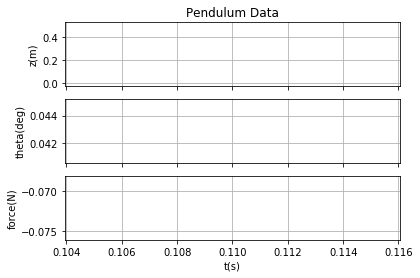

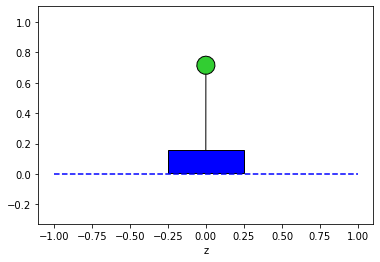

In [0]:
#%matplotlib tk 
sys.path.append('control_book_public_solutions/_B_pendulum/python')
sys.path.append('control_book_public_solutions/_B_pendulum/python/hw10/')  # add homework directory
import pendulumParam as P
from hw_b.pendulumDynamics import pendulumDynamics
from hw10.pendulumController import pendulumController
from hw_a.signalGenerator import signalGenerator
from hw_a.pendulumAnimation import pendulumAnimation
from hw_a.dataPlotter import dataPlotter as pendulumPlotData

pendulum = pendulumDynamics()
ctrl = pendulumController() # put in the gains we computed above for the inner loop. 
reference = signalGenerator(amplitude=0.5, frequency=0.02)

# instantiate the simulation plots and animation
pendDataPlot = pendulumPlotData()
animation = pendulumAnimation()

t = P.t_start  # time starts at t_start
while t < P.t_end:  # main simulation loop
    # Get referenced inputs from signal generators
    ref_input = reference.square(t)
    # Propagate dynamics in between plot samples
    t_next_plot = t + P.t_plot
    while t < t_next_plot: # updates control and dynamics at faster simulation rate
        u = ctrl.update(ref_input, pendulum.state)  # Calculate the control value        
        pendulum.update(u)  # Propagate the dynamics
        t = t + P.Ts  # advance time by Ts
    # update animation and data plots
    animation.update(pendulum.state)
    pendDataPlot.update(t, ref_input, pendulum.state, u)
    #dataPlot.update(t, [0.0,0.0], pendulum.state, u)
    plt.pause(0.0001)  # the pause causes the figure to be displayed during the simulation

In [0]:
def postProcessPlotPendulum(dataPlot_pen):
  # Create a new figure, after the simulator has run, and display all the data: 
  fig, axes = plt.subplots(nrows=3, ncols=1)
  fig.tight_layout()
  plt.subplot(311)  
  plt.plot(dataPlot_pen.time_history, np.transpose([dataPlot_pen.z_history, dataPlot_pen.zref_history]))
  plt.title('Pendulum Data' )
  plt.ylabel('$z$ (deg)')  
  plt.xlabel('time (s)')
  plt.subplot(312)  
  plt.plot(dataPlot_pen.time_history, np.transpose(dataPlot_pen.theta_history))
  plt.ylabel('$\theta$ (deg)')  
  plt.xlabel('time (s)')
  plt.subplot(313)
  plt.plot(dataPlot_pen.time_history, dataPlot_pen.Force_history)
  plt.ylabel('Force (N)')
  plt.xlabel('time (s)')

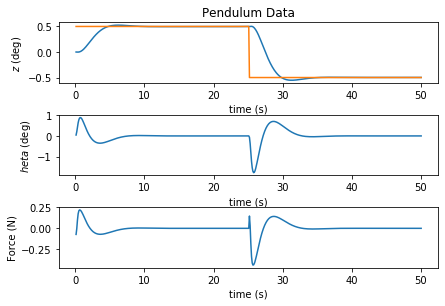

In [0]:
postProcessPlotPendulum(pendDataPlot)

# Examples - Design Study C: Satellite Control
> (a)  Modify the system dynamics file so that the parameters $J_s$, $J_p$, $k$ and $b$ vary by up to 20\% of their nominal value each time they are run (uncertainty parameter = 0.2).

>(b)  Rearrange the block diagram so that the controller is implemented as an m-function implemented at the sample rate of $T_s=0.01$.  Assume that the controller only has knowledge of the angles $\phi$ and $\theta$ as well as the reference angle $\phi_r$.

>(c)  Implement the nested PID loops designed in Problems C.8 using an m-function called satellite\_ctrl.m.   Use the dirty derivative gain of $\tau=0.05$. Tune the integrator to remove the steady state error caused by the uncertain parameters.

## C - (a) Vary Dynamic Parameters
Here is code demonstrating varying the dynamic parameters: 
```
# The parameters for any physical system are never known exactly.  Feedback
# systems need to be designed to be robust to this uncertainty.  In the simulation
# we model uncertainty by changing the physical parameters by a uniform random variable
# that represents alpha*100 % of the parameter, i.e., alpha = 0.2, means that the parameter
# may change by up to 20%.  A different parameter value is chosen every time the simulation
# is run.
alpha = 0.2  # Uncertainty parameter
self.Js = P.Js * (1+2*alpha*np.random.rand()-alpha)  # inertia of base
self.Jp = P.Jp * (1+2*alpha*np.random.rand()-alpha)  # inertia of panel
self.k = P.k * (1+2*alpha*np.random.rand()-alpha)    # spring coefficient
self.b = P.b * (1+2*alpha*np.random.rand()-alpha)    # Damping coefficient, Ns

```

## C - (b) Sample Control at $T_s$
See part A - (b) above

## C - (c) Simulate PID
Here is the simulation of our PID controller, see the ability of the control to take out state state error. 

In [0]:
# Design Problem B : Pendulum
sys.path.remove('control_book_public_solutions/_B_pendulum/python')
sys.path.remove('control_book_public_solutions/_B_pendulum/python/hw10/')

k_DC_phi 0.3781272785378374
kp_th:  49.23775510204083
kd_th:  22.169999999999998
kp_phi:  0.6098984704403007
kd_phi:  2.8573062567076946


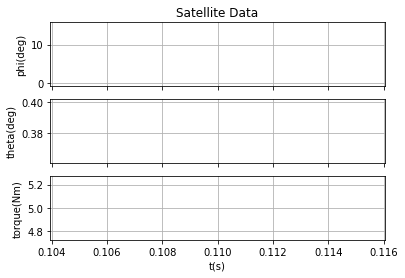

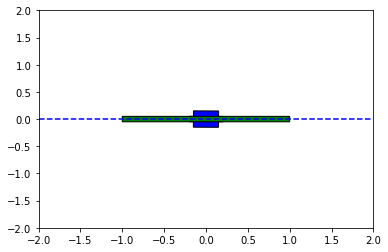

In [0]:
#%matplotlib tk 
sys.path.append('control_book_public_solutions/_C_satellite/python/')
sys.path.append('control_book_public_solutions/_C_satellite/python/hw10')
import satelliteParam as P
from hw_b.satelliteDynamics import satelliteDynamics
from hw10.satelliteController import satelliteController
from hw_a.signalGenerator import signalGenerator
from hw_a.satelliteAnimation import satelliteAnimation
from hw_a.dataPlotter import dataPlotter as satellitePlotData
P.k = 0.1

# instantiate satellite, controller, and reference classes
satellite = satelliteDynamics()
ctrl = satelliteController()
reference = signalGenerator(amplitude=15.0*np.pi/180.0, frequency=0.02)

# set disturbance input
disturbance = 0.50

# instantiate the simulation plots and animation
satDataPlot = satellitePlotData()
animation = satelliteAnimation()

t = P.t_start  # time starts at t_start
while t < P.t_end:  # main simulation loop
    # Get referenced inputs from signal generators
    ref_input = reference.square(t)
    # Propagate dynamics in between plot samples
    t_next_plot = t + P.t_plot
    while t < t_next_plot:  # updates control and dynamics at faster simulation rate
        tau = ctrl.update(ref_input, satellite.state)  # Calculate the control value
        sys_input = tau+disturbance  # input to plant is control input + disturbance (formatted as a list)
        satellite.update(sys_input)  # Propagate the dynamics with disturbance input
        t = t + P.Ts  # advance time by Ts
    # update animation and data plots
    animation.update(satellite.state)
    satDataPlot.update(t, ref_input, satellite.state, tau)
    plt.pause(0.0001)  # the pause causes the figure to be displayed during the simulation

In [0]:
def postProcessPlotSatellite(dataPlot_sat):
  # Create a new figure, after the simulator has run, and display all the data: 
  fig, axes = plt.subplots(nrows=3, ncols=1)
  fig.tight_layout()
  plt.subplot(311)  
  plt.plot(dataPlot_sat.time_history, np.transpose([dataPlot_sat.phi_history, dataPlot_sat.phi_ref_history]))
  plt.title('Satellite Data' )
  plt.ylabel('$\phi$ (deg)')  
  plt.xlabel('time (s)')
  plt.subplot(312)  
  plt.plot(dataPlot_sat.time_history, np.transpose(dataPlot_sat.theta_history))
  plt.ylabel('$\theta$ (deg)')  
  plt.xlabel('time (s)')
  plt.subplot(313)
  plt.plot(dataPlot_sat.time_history, dataPlot_sat.torque_history)
  plt.ylabel('Torque (Nm)')
  plt.xlabel('time (s)')

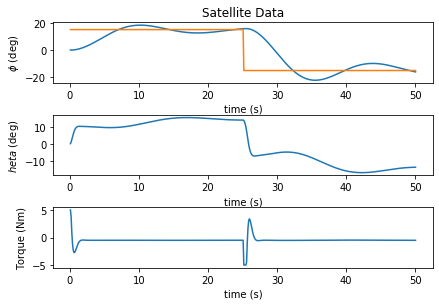

In [0]:
postProcessPlotSatellite(satDataPlot)